# Installing required libraries for skin cancer detection project.
# These include data handling (numpy, pandas), deep learning (fastai, timm, torchcam, captum),
# and image processing tools (opencv).


In [1]:
!pip install numpy==1.26.4
!pip install pandas==2.2.2
!pip install fastai==2.7.14 timm==1.0.9 opencv-python==4.10.0.84 opencv-contrib-python==4.10.0.84 torchcam==0.4.0 captum==0.8.0


# Uninstalling 'torchaudio' as it is not required for this skin cancer detection project.
# This helps reduce unnecessary dependencies and potential conflicts.


In [2]:
!pip uninstall -y torchaudio


# Mounting Google Drive to access project files stored in the cloud.
# This allows reading and writing data directly from/to Google Drive.



In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls "/content/drive/MyDrive"


' 3آموزش یادگیری ماشین محمد منثوری.gdoc'
 4_446163947192582561.pdf
 4_5868501201376511146.pdf
 AGB
 alpari4setup.exe
'andrewg BC.gdoc'
'ANTI DOPING.gdoc'
'ANTI DOPING.pdf'
'Arman Valikhani - Lebenslauf (1).pdf'
'Arman Valikhani - Lebenslauf.pdf'
'Book report (1).gslides'
'Book report.gslides'
'Colab Notebooks'
'Consulting proposal.gslides'
'CV Main.pdf'
 deeplearningbook.pdf
 erklaerung-zum-studienvorhaben-data.gdoc
 erklaerung-zum-studienvorhaben-data.pdf
 ExpressVPN.apk
'Flash cards (1).gslides'
'Flash cards.gslides'
'General presentation.gslides'
'Google AI Studio'
'Google Earth'
 ivacy_windows_setup.exe
'Kommunikation für alle_copy.pdf'
'Lesson plan.gslides'
 Lookbook.gslides
 mns-einstufungstest-teil1.pdf
 mns-loesungsschluessel-AB-A12.pdf
'MohammadReza Golkar-ex2.gdoc'
'mojdeh pass asl.jpg'
 NEU_SchengenGrundsatzMerkblatt.pdf
 passport.jpg
 payannameh.zip
 Proposal.gdoc
'receipt (2).pdf'
 receipt.pdf
 resnet50_baseline_export.pkl
 resnet50_baseline_log.csv
 resnet50_baseline_re

In [5]:
!unzip "/content/drive/MyDrive/payannameh.zip" -d "/content/dataset"


Archive:  /content/drive/MyDrive/payannameh.zip
replace /content/dataset/HAM10000_images_part_1/ISIC_0024306.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
!ls /content/dataset


ham10000_images		HAM10000_images_part_2	hmnist_8_8_L.csv
ham10000_images_part_1	HAM10000_metadata.csv	hmnist_8_8_RGB.csv
HAM10000_images_part_1	hmnist_28_28_L.csv
ham10000_images_part_2	hmnist_28_28_RGB.csv


# Merging image files from two separate folders into a single directory for unified access.
# Then, loading the metadata CSV file into a pandas DataFrame to explore dataset structure.


In [8]:
import pandas as pd
import os
import shutil

# مسیر پوشه‌ها
part1 = "/content/dataset/ham10000_images_part_1"
part2 = "/content/dataset/ham10000_images_part_2"
merged = "/content/dataset/ham10000_images"

# ساختن پوشه نهایی اگر وجود نداشت
os.makedirs(merged, exist_ok=True)

# یکی کردن همه‌ی عکس‌ها
for folder in [part1, part2]:
    for file in os.listdir(folder):
        shutil.copy(os.path.join(folder, file), merged)

print("✅ همه تصاویر در یک پوشه کپی شدند:", len(os.listdir(merged)))

# خواندن متادیتا
metadata_path = "/content/dataset/HAM10000_metadata.csv"
df = pd.read_csv(metadata_path)
print("شکل دیتافریم:", df.shape)
df.head()


✅ همه تصاویر در یک پوشه کپی شدند: 10015
شکل دیتافریم: (10015, 7)


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


# Adding image file paths to the DataFrame and verifying their existence.
# Then, visualizing the class distribution in the HAM10000 dataset using a count plot.


       image_id   dx                                               path
0  ISIC_0027419  bkl  /content/dataset/ham10000_images/ISIC_0027419.jpg
1  ISIC_0025030  bkl  /content/dataset/ham10000_images/ISIC_0025030.jpg
2  ISIC_0026769  bkl  /content/dataset/ham10000_images/ISIC_0026769.jpg
3  ISIC_0025661  bkl  /content/dataset/ham10000_images/ISIC_0025661.jpg
4  ISIC_0031633  bkl  /content/dataset/ham10000_images/ISIC_0031633.jpg
تعداد عکس‌های گم‌شده: 0


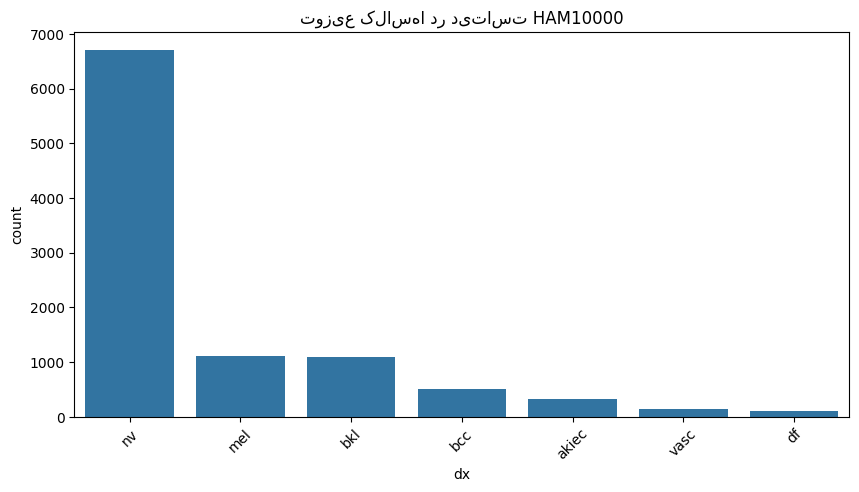

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# اضافه کردن مسیر فایل به دیتافریم
image_dir = "/content/dataset/ham10000_images"
df['path'] = df['image_id'].apply(lambda x: os.path.join(image_dir, x + ".jpg"))

# چک کردن چند نمونه
print(df[['image_id', 'dx', 'path']].head())

# بررسی اینکه همه فایل‌ها وجود دارن
missing = df[~df['path'].apply(os.path.exists)]
print("تعداد عکس‌های گم‌شده:", len(missing))

# شمارش نمونه‌های هر کلاس
plt.figure(figsize=(10,5))
sns.countplot(x="dx", data=df, order=df['dx'].value_counts().index)
plt.xticks(rotation=45)
plt.title("توزیع کلاس‌ها در دیتاست HAM10000")
plt.show()


# Defining a DataBlock for skin lesion classification using FastAI.
# It reads image paths and labels from the DataFrame, applies resizing and augmentations,
# splits the data into training and validation sets, and creates DataLoaders.
# Finally, it displays a sample batch of images with their labels.


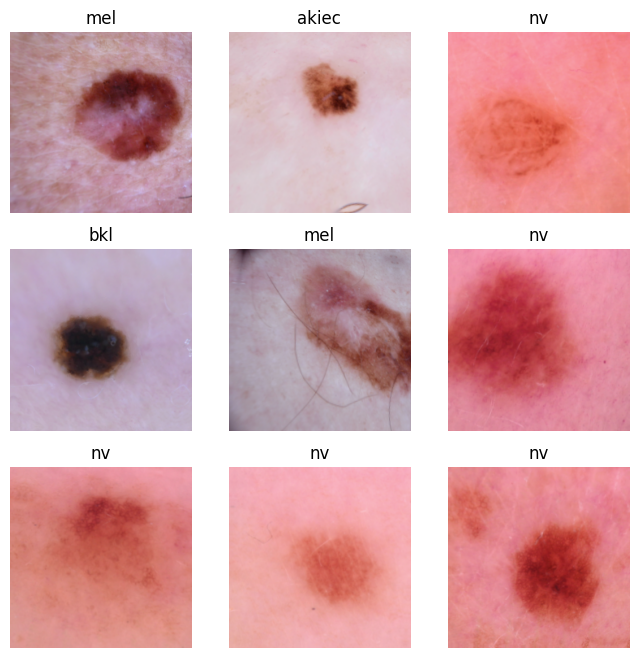

In [10]:
from fastai.vision.all import *

# تعریف DataBlock
skin_lesion_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # ورودی عکس، خروجی کلاس
    get_x=ColReader("path"),              # ورودی از ستون path
    get_y=ColReader("dx"),                # لیبل از ستون dx
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # 20٪ برای validation
    item_tfms=Resize(224),                # تغییر سایز همه به 224x224
    batch_tfms=aug_transforms(mult=1.0)   # اعمال augmentation
)

# ساخت DataLoaders
dls = skin_lesion_block.dataloaders(df, bs=32)

# نمایش چند نمونه
dls.show_batch(max_n=9, figsize=(8,8))


In [11]:
# Cell: env_check
import torch, fastai, timm, numpy as np
print("torch:", torch.__version__, "| CUDA available:", torch.cuda.is_available())
import fastai
print("fastai:", fastai.__version__)
print("timm:", timm.__version__)
print("numpy:", np.__version__)


torch: 2.2.2+cu121 | CUDA available: True
fastai: 2.7.14
timm: 1.0.9
numpy: 1.26.4


# Setting a fixed random seed to ensure reproducibility of results across runs.
# This affects Python's random module, NumPy, and PyTorch (including CUDA if available).


In [12]:
# Cell: set_seed
import random, numpy as np, torch
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
set_seed(42)
print("seed set")


seed set


# Building DataLoaders with customized transformations and batch size.
# Includes vertical flipping and warp-free augmentations for better generalization.
# Adjust 'bs' (batch size) based on available GPU memory.
# Finally, displays a sample batch of preprocessed skin lesion images.


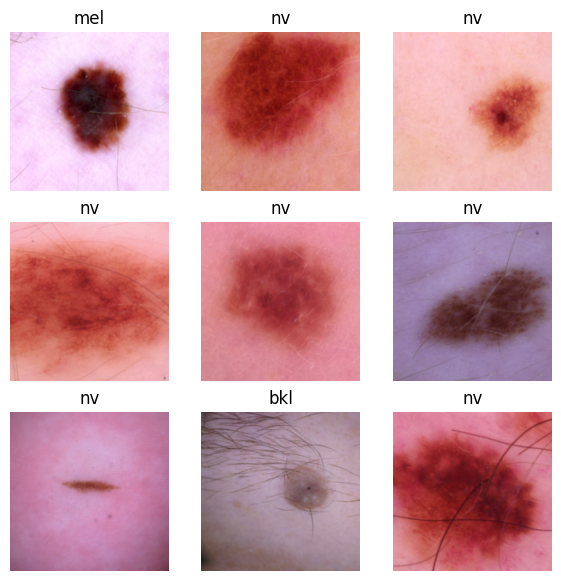

In [13]:
# Cell: build_dls
from fastai.vision.all import *
bs = 32   # اگر حافظه GPU کم بود عدد را کمتر کن (مثلاً 16)
item_tfms = Resize(224)    # برای baseline 224 خوبه
batch_tfms = aug_transforms(size=224, flip_vert=True, max_warp=0.)

skin_lesion_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=ColReader("path"),
    get_y=ColReader("dx"),
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=item_tfms,
    batch_tfms=batch_tfms
)

dls = skin_lesion_block.dataloaders(df, bs=bs)   # df همون metadata که ساختیم
dls.show_batch(max_n=9, figsize=(7,7))


# Creating a FastAI learner using ResNet50 architecture for skin lesion classification.
# Enables mixed precision training for faster computation if supported.
# Then runs learning rate finder to suggest optimal learning rates for training.


/usr/local/lib/python3.12/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 70.4MB/s]


Using mixed precision (fp16)
Running lr_find (may show a plot)...


Suggested lr (minimum): SuggestedLRs(minimum=0.00831763744354248, steep=0.0012022644514217973)


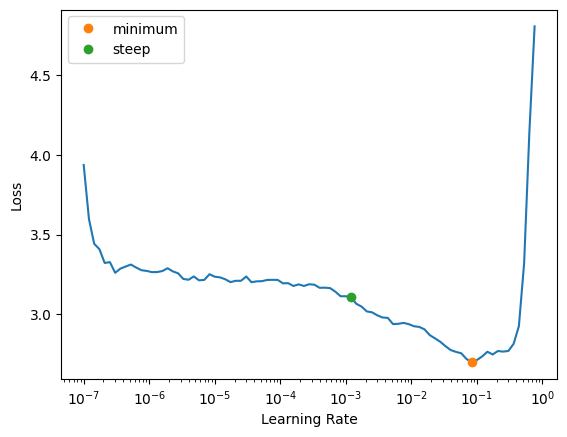

In [14]:
# Cell: learner_and_lrfinder
from fastai.vision.all import resnet50, cnn_learner, accuracy, SaveModelCallback

learn = cnn_learner(dls, resnet50, metrics=[accuracy], cbs=[SaveModelCallback(monitor='accuracy', fname='resnet50_best')])
# پیشنهاد: mixed precision اگر نیاز به سرعت دارید
try:
    learn.to_fp16()
    print("Using mixed precision (fp16)")
except Exception as e:
    print("fp16 not applied:", e)

# lr_find
print("Running lr_find (may show a plot)...")
lr_min = learn.lr_find(suggest_funcs=(minimum, steep))
print("Suggested lr (minimum):", lr_min)


# Training the baseline model using fine-tuning with a learning rate of 3e-3.
# The 'fine_tune' method first freezes the base layers, then unfreezes and trains with discriminative learning rates.
# The number of epochs can be increased for better performance; here we start with 5 for initial testing.


In [15]:
# Cell: train_baseline
# مقدار lr را بر اساس lr_find تنظیم کن؛ اگر lr_find خروجی نداشت، از 3e-3 یا 1e-3 شروع کن
lr = 3e-3

# fine_tune انجام می‌دهد freeze اولیه و سپس unfreeze با نرخ‌های مختلف
learn.fine_tune(5, base_lr=lr)   # این عدد epoch را می‌توان بالا برد؛ برای تست اولیه 5 کافی است


epoch,train_loss,valid_loss,accuracy,time
0,1.269678,0.898798,0.701448,01:48


Better model found at epoch 0 with accuracy value: 0.7014478445053101.


epoch,train_loss,valid_loss,accuracy,time
0,0.760254,0.661791,0.772841,01:43
1,0.626174,0.571911,0.802297,01:39
2,0.510974,0.475956,0.827259,01:39
3,0.408121,0.435368,0.840739,01:39
4,0.353871,0.421774,0.846730,01:38


Better model found at epoch 0 with accuracy value: 0.7728407382965088.
Better model found at epoch 1 with accuracy value: 0.8022965788841248.
Better model found at epoch 2 with accuracy value: 0.8272591233253479.
Better model found at epoch 3 with accuracy value: 0.8407388925552368.
Better model found at epoch 4 with accuracy value: 0.8467299342155457.


# Evaluating model performance using multiple metrics:
# - Accuracy: overall correctness of predictions.
# - Classification report: precision, recall, and F1-score per class.
# - F1 macro: average F1-score across all classes.
# - ROC AUC (macro): multi-class area under the ROC curve.
# - Confusion matrix: visual representation of prediction errors per class.


Validation Accuracy: 0.8467
Classes: ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

Classification Report:
              precision    recall  f1-score   support

       akiec       0.62      0.46      0.53        61
         bcc       0.74      0.69      0.71        90
         bkl       0.69      0.70      0.70       241
          df       0.79      0.63      0.70        30
         mel       0.67      0.58      0.62       233
          nv       0.91      0.96      0.93      1316
        vasc       0.93      0.81      0.87        32

    accuracy                           0.85      2003
   macro avg       0.76      0.69      0.72      2003
weighted avg       0.84      0.85      0.84      2003

F1 macro: 0.7229297440142803
ROC AUC (macro): 0.9708413579568845


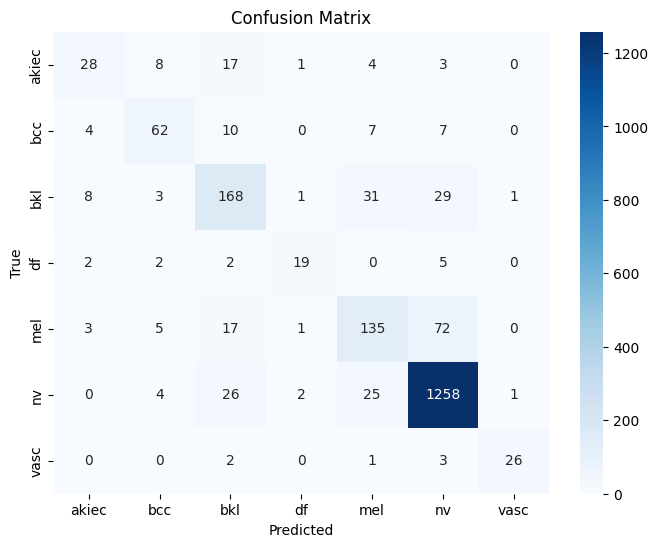

In [16]:
# Cell: evaluate_metrics_fixed
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# get predictions (probs) and targets
probs, targets = learn.get_preds()
probs = probs.numpy()
targets = targets.numpy()
preds = np.argmax(probs, axis=1)

# accuracy
val_acc = (preds == targets).mean()
print(f"Validation Accuracy: {val_acc:.4f}")

# classification report
vocab = list(dls.vocab)
print("Classes:", vocab)
print("\nClassification Report:")
print(classification_report(targets, preds, target_names=vocab))

# F1 macro
f1_macro = f1_score(targets, preds, average='macro')
print("F1 macro:", f1_macro)

# ROC AUC (multiclass OVR)
try:
    y_true = label_binarize(targets, classes=range(len(vocab)))
    y_score = probs
    roc_auc_macro = roc_auc_score(y_true, y_score, average='macro', multi_class='ovr')
except Exception as e:
    roc_auc_macro = None
    print("ROC AUC calculation error:", e)
print("ROC AUC (macro):", roc_auc_macro)

# confusion matrix (پلات)
cm = confusion_matrix(targets, preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=vocab, yticklabels=vocab, cmap='Blues')
plt.ylabel('True'); plt.xlabel('Predicted'); plt.title('Confusion Matrix')
plt.show()


# Exporting the trained ResNet50 model for future use and saving it to Google Drive.
# Also saves the training log (metrics per epoch) as a CSV file for analysis and reproducibility.
# Optionally displays contents of the model directory.


In [17]:
# Cell: save_model_and_logs_fixed
import pandas as pd
import os

# ذخیره مدل کامل برای بارگذاری در آینده
model_path = '/content/drive/MyDrive/resnet50_ham10000_export.pkl'
learn.export(model_path)
print(f"Model exported to: {model_path}")

# نمایش محتویات فولدر مدل‌ها (اختیاری)
model_dir = learn.path/learn.model_dir
if os.path.exists(model_dir):
    print("Contents of models folder:", os.listdir(model_dir))
else:
    print("Model folder not found.")

# ذخیره لاگ recorder
rec = learn.recorder
metrics = rec.values
colnames = rec.metric_names[1:len(metrics[0])+1]  # هم‌اندازه با هر row
df_metrics = pd.DataFrame(metrics, columns=colnames)
log_path = '/content/drive/MyDrive/resnet50_training_log.csv'
df_metrics.to_csv(log_path, index=False)
print(f"Training log saved to: {log_path}")



Model exported to: /content/drive/MyDrive/resnet50_ham10000_export.pkl
Contents of models folder: ['resnet50_best.pth']
Training log saved to: /content/drive/MyDrive/resnet50_training_log.csv


# Computing class weights to address class imbalance in the dataset.
# Applies a weighted CrossEntropyLoss to penalize underrepresented classes more strongly.
# This improves model fairness and performance across all categories.


In [18]:
# Cell: class_weights_loss (optional)
from sklearn.utils.class_weight import compute_class_weight
import torch

classes = df['dx'].unique()
class_w = compute_class_weight(class_weight='balanced', classes=classes, y=df['dx'])
# map to order used by dls.vocab
weights = [class_w[list(classes).index(c)] for c in dls.vocab]
weights = torch.tensor(weights, dtype=torch.float).to(learn.dls.device)
learn.loss_func = torch.nn.CrossEntropyLoss(weight=weights)
print("Applied weighted CrossEntropyLoss")
# سپس می‌توانی دوباره fit کنی (مثلاً learn.fine_tune(3, base_lr=lr/10))


Applied weighted CrossEntropyLoss


# Final training and evaluation of the ResNet50 baseline model.
# Includes safe fine-tuning with callbacks (SaveModel and EarlyStopping),
# followed by performance evaluation using accuracy, F1 macro, ROC AUC, and confusion matrix.
# Finally, exports the trained model, training logs, and summary metrics to Google Drive.


Available metrics: ['epoch', 'train_loss', 'valid_loss', 'accuracy', 'time']
👉 Monitoring metric: accuracy


epoch,train_loss,valid_loss,accuracy,time
0,0.501606,0.732698,0.797803,01:38


Better model found at epoch 0 with accuracy value: 0.7978032827377319.
Better model found at epoch 0 with accuracy value: 0.7978032827377319.


epoch,train_loss,valid_loss,accuracy,time
0,0.464413,0.659365,0.819271,01:38
1,0.459145,0.787520,0.806291,01:38
2,0.459643,0.739215,0.820769,01:37
3,0.378621,0.786208,0.805292,01:38
4,0.389691,0.656765,0.831253,01:38
5,0.304051,0.639572,0.836246,01:40
6,0.284487,0.663621,0.845232,01:37
7,0.273862,0.647840,0.835247,01:38


Better model found at epoch 0 with accuracy value: 0.8192710876464844.
Better model found at epoch 0 with accuracy value: 0.8192710876464844.
Better model found at epoch 2 with accuracy value: 0.8207688331604004.
Better model found at epoch 2 with accuracy value: 0.8207688331604004.
Better model found at epoch 4 with accuracy value: 0.8312531113624573.
Better model found at epoch 4 with accuracy value: 0.8312531113624573.
Better model found at epoch 5 with accuracy value: 0.8362456560134888.
Better model found at epoch 5 with accuracy value: 0.8362456560134888.
Better model found at epoch 6 with accuracy value: 0.8452321290969849.
Better model found at epoch 6 with accuracy value: 0.8452321290969849.



Validation Accuracy: 0.8452

Classification Report:
              precision    recall  f1-score   support

       akiec       0.65      0.51      0.57        61
         bcc       0.75      0.78      0.77        90
         bkl       0.69      0.75      0.72       241
          df       0.49      0.73      0.59        30
         mel       0.62      0.75      0.68       233
          nv       0.95      0.90      0.93      1316
        vasc       0.94      0.97      0.95        32

    accuracy                           0.85      2003
   macro avg       0.73      0.77      0.74      2003
weighted avg       0.86      0.85      0.85      2003

F1 macro: 0.7424363113882351
ROC AUC (macro): 0.9561462764787468


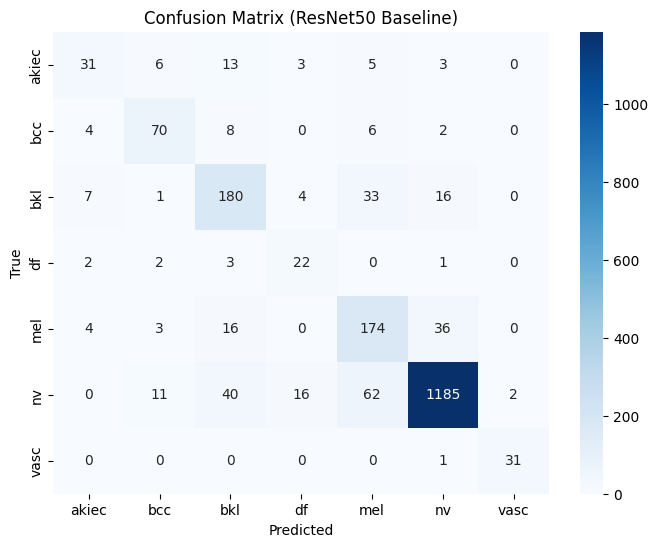

✅ Model exported to Drive.
✅ Training log saved.
✅ Summary results saved.

✅ Baseline (ResNet50) training finished successfully!


In [19]:
# Cell: final_finetune_resnet50_safe_complete

from fastai.callback.tracker import SaveModelCallback, EarlyStoppingCallback
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

# -------- Training with Fine-tune --------
n_epochs = 8
lr = 1e-3

# بررسی متریک‌های موجود
print("Available metrics:", learn.recorder.metric_names)

# اگر accuracy موجود نیست، از valid_loss استفاده می‌کنیم
monitor_metric = "accuracy" if "accuracy" in learn.recorder.metric_names else "valid_loss"
print(f"👉 Monitoring metric: {monitor_metric}")

# Fine-tune با کال‌بک‌های امن
learn.fine_tune(
    n_epochs,
    base_lr=lr,
    cbs=[
        SaveModelCallback(monitor=monitor_metric, fname='resnet50_best'),
        EarlyStoppingCallback(monitor=monitor_metric, patience=3)
    ]
)

# -------- Evaluate Metrics --------
probs, targets = learn.get_preds()
preds = probs.argmax(dim=1)

# حساب accuracy امن از پیش‌بینی‌ها
val_acc = (preds == targets).float().mean().item()
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Classification report
vocab = dls.vocab
print("\nClassification Report:")
print(classification_report(targets.numpy(), preds.numpy(), target_names=vocab))

# F1 macro
f1_macro = f1_score(targets.numpy(), preds.numpy(), average='macro')
print("F1 macro:", f1_macro)

# ROC AUC (macro)
y_true = label_binarize(targets.numpy(), classes=range(len(vocab)))
y_score = probs.numpy()
try:
    roc_auc_macro = roc_auc_score(y_true, y_score, average='macro', multi_class='ovr')
except Exception as e:
    roc_auc_macro = None
    print("ROC AUC error:", e)
print("ROC AUC (macro):", roc_auc_macro)

# Confusion Matrix
cm = confusion_matrix(targets.numpy(), preds.numpy())
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=vocab, yticklabels=vocab, cmap="Blues")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (ResNet50 Baseline)')
plt.show()

# -------- Save Model & Logs --------
# Export full model
learn.export('/content/drive/MyDrive/resnet50_baseline_export.pkl')
print("✅ Model exported to Drive.")

# Save training log safely
rec = learn.recorder
metrics = rec.values  # list of lists
if len(metrics) > 0:
    metrics = np.array(metrics)  # تبدیل به array برای دسترسی به shape
    n_cols = metrics.shape[1]
    colnames = rec.metric_names[1:1+n_cols]  # هماهنگ با تعداد واقعی ستون‌ها
    df_metrics = pd.DataFrame(metrics, columns=colnames)
    df_metrics.to_csv('/content/drive/MyDrive/resnet50_baseline_log.csv', index=False)
    print("✅ Training log saved.")
else:
    print("⚠️ No metrics recorded!")

# Save summary results
results = {
    "Accuracy": float(val_acc),
    "F1_macro": float(f1_macro),
    "ROC_AUC_macro": float(roc_auc_macro) if roc_auc_macro else None
}
results_df = pd.DataFrame([results])
results_df.to_csv('/content/drive/MyDrive/resnet50_baseline_results.csv', index=False)
print("✅ Summary results saved.")

print("\n✅ Baseline (ResNet50) training finished successfully!")


# Training and evaluating a Vision Transformer (ViT) model using the timm library.
# Includes defining a custom learner, fine-tuning with callbacks, and evaluating performance
# using accuracy, F1 macro, ROC AUC, and confusion matrix.
# Finally, exports the trained model, training logs, and summary metrics to Google Drive.


گام بعد: Vision Transformer (ViT)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.975316,0.893479,0.686470,04:51


Better model found at epoch 0 with accuracy value: 0.6864702701568604.


epoch,train_loss,valid_loss,accuracy,time
0,0.722981,0.705138,0.744883,04:51
1,0.773870,0.790818,0.696455,04:50
2,0.738713,0.720805,0.707439,04:50
3,0.673802,0.719483,0.733400,04:50


Better model found at epoch 0 with accuracy value: 0.7448827028274536.
No improvement since epoch 0: early stopping



Validation Accuracy: 0.7449

Classification Report:
              precision    recall  f1-score   support

       akiec       0.36      0.57      0.44        61
         bcc       0.54      0.21      0.30        90
         bkl       0.60      0.43      0.50       241
          df       0.00      0.00      0.00        30
         mel       0.63      0.25      0.36       233
          nv       0.79      0.97      0.87      1316
        vasc       1.00      0.19      0.32        32

    accuracy                           0.74      2003
   macro avg       0.56      0.37      0.40      2003
weighted avg       0.72      0.74      0.71      2003

F1 macro: 0.3991183033945976
ROC AUC (macro): 0.9227530404750647


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


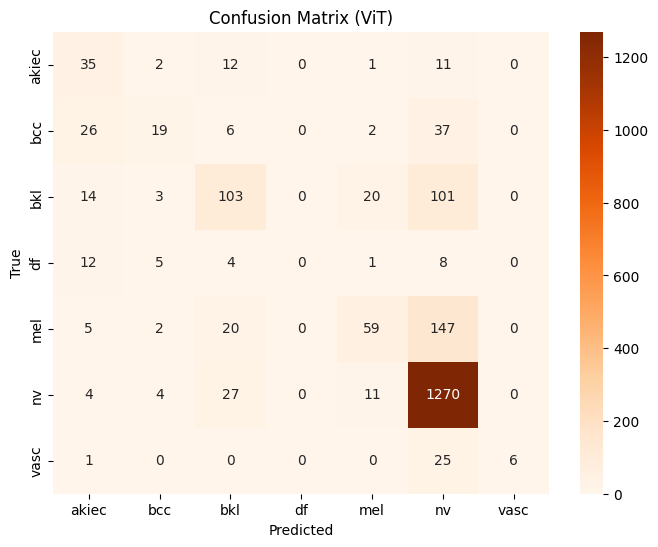

✅ ViT model exported to Drive.
✅ Training log saved.
✅ Summary results saved.

✅ ViT training finished successfully!


In [20]:
# -------- Imports --------
from fastai.vision.all import *
from fastai.callback.tracker import SaveModelCallback, EarlyStoppingCallback
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import timm

# -------- Define timm_learner --------
def timm_learner(dls, arch_name, pretrained=True, metrics=None):
    model = timm.create_model(arch_name, pretrained=pretrained, num_classes=dls.c)
    learn = Learner(dls, model, metrics=metrics)
    return learn

# -------- Load ViT via timm_learner --------
arch = 'vit_base_patch16_224'
learn = timm_learner(dls, arch, pretrained=True, metrics=accuracy)

# -------- Fine-tune --------
n_epochs = 8
lr = 1e-3

learn.fine_tune(
    n_epochs,
    base_lr=lr,
    cbs=[
        SaveModelCallback(monitor='accuracy', fname='vit_best'),
        EarlyStoppingCallback(monitor='accuracy', patience=3)
    ]
)

# -------- Evaluate Metrics --------
probs, targets = learn.get_preds()
preds = probs.argmax(dim=1)
val_acc = (preds == targets).float().mean().item()
print(f"\nValidation Accuracy: {val_acc:.4f}")

vocab = dls.vocab
print("\nClassification Report:")
print(classification_report(targets.numpy(), preds.numpy(), target_names=vocab))

f1_macro = f1_score(targets.numpy(), preds.numpy(), average='macro')
print("F1 macro:", f1_macro)

y_true = label_binarize(targets.numpy(), classes=range(len(vocab)))
y_score = probs.numpy()
try:
    roc_auc_macro = roc_auc_score(y_true, y_score, average='macro', multi_class='ovr')
except Exception:
    roc_auc_macro = None
print("ROC AUC (macro):", roc_auc_macro)

# Confusion Matrix
cm = confusion_matrix(targets.numpy(), preds.numpy())
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=vocab, yticklabels=vocab, cmap="Oranges")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (ViT)')
plt.show()

# -------- Save Model & Logs --------
learn.export('/content/drive/MyDrive/vit_export.pkl')
print("✅ ViT model exported to Drive.")

rec = learn.recorder
metrics = rec.values
if len(metrics) > 0:
    metrics = np.array(metrics)
    n_cols = metrics.shape[1]
    colnames = rec.metric_names[1:1+n_cols]
    df_metrics = pd.DataFrame(metrics, columns=colnames)
    df_metrics.to_csv('/content/drive/MyDrive/vit_log.csv', index=False)
    print("✅ Training log saved.")
else:
    print("⚠️ No metrics recorded!")

results = {
    "Accuracy": float(val_acc),
    "F1_macro": float(f1_macro),
    "ROC_AUC_macro": float(roc_auc_macro) if roc_auc_macro else None
}
results_df = pd.DataFrame([results])
results_df.to_csv('/content/drive/MyDrive/vit_results.csv', index=False)
print("✅ Summary results saved.")

print("\n✅ ViT training finished successfully!")


# Applying Grad-CAM (SmoothGradCAM++) to visualize model attention on skin lesion images.
# Loads the trained ViT model, preprocesses sample images, and generates 2D heatmaps
# to highlight regions influencing the model's predictions.
# This helps interpret and validate model decisions in a human-understandable way.



🔹 Image 1: /content/dataset/ham10000_images/ISIC_0031301.jpg
Predicted class: bkl


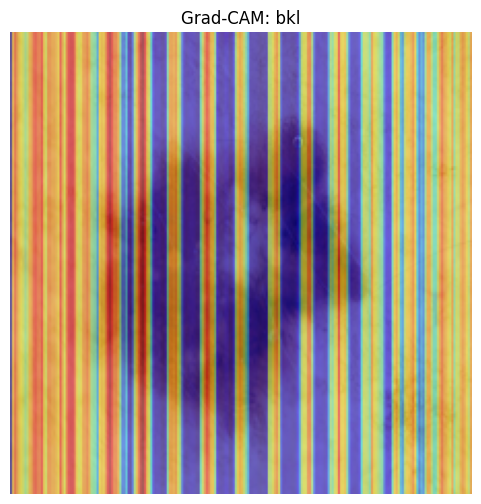


🔹 Image 2: /content/dataset/ham10000_images/ISIC_0028558.jpg
Predicted class: bkl


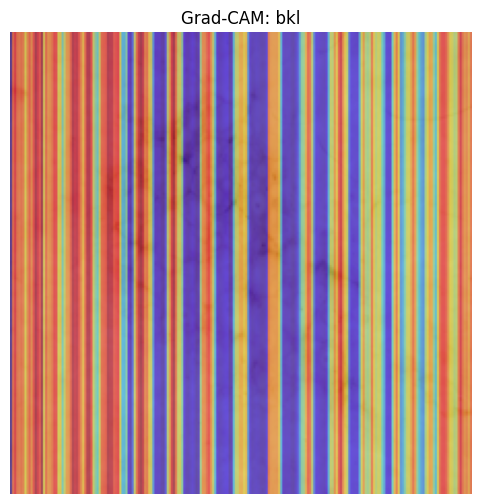

✅ Grad-CAM done with 2D resized heatmaps.


In [27]:
# -------- XAI: Grad-CAM for ViT (fixed) --------
from fastai.vision.all import *
import torch
import timm
from torchcam.methods import SmoothGradCAMpp
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import glob

# -------- Load trained ViT model --------
learn = load_learner('/content/drive/MyDrive/vit_export.pkl')
model = learn.model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
dls = learn.dls
vocab = dls.vocab

# -------- Select sample images --------
sample_paths = glob.glob('/content/dataset/ham10000_images/*.jpg')[:2]  # دو تصویر اول

# -------- Image preprocessing --------
def preprocess_image(path, size=224):
    img = Image.open(path).convert('RGB').resize((size, size))
    img_tensor = torch.tensor(np.array(img)).permute(2,0,1).unsqueeze(0).float()/255.0
    return img_tensor.to(device)

# -------- Grad-CAM for ViT (fixed 2D heatmap) --------
import cv2

for i, path in enumerate(sample_paths):
    print(f"\n🔹 Image {i+1}: {path}")
    xb = preprocess_image(path)
    xb.requires_grad_(True)

    # Prediction
    out = model(xb)
    pred_class = out.argmax(dim=1).item()
    print("Predicted class:", vocab[pred_class])

    # Grad-CAM
    activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)
    heatmap = activation_map[0].detach().cpu().numpy()  # shape = [num_tokens, channels] یا [num_patches, C]

    # -------- Convert to 2D --------
    if heatmap.ndim > 2:
        heatmap_2d = np.mean(heatmap, axis=-1)  # average over channels
    else:
        heatmap_2d = heatmap

    # -------- Resize heatmap to image size --------
    img = Image.open(path).convert('RGB').resize((224,224))
    heatmap_resized = cv2.resize(heatmap_2d, (224,224))
    heatmap_resized = (heatmap_resized - heatmap_resized.min()) / (heatmap_resized.max() - heatmap_resized.min() + 1e-8)

    # -------- Plot --------
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
    plt.title(f"Grad-CAM: {vocab[pred_class]}")
    plt.axis('off')
    plt.show()

print("✅ Grad-CAM done with 2D resized heatmaps.")




# Comparing performance of ResNet50 and ViT models using saved evaluation metrics.
# Loads results from CSV files and visualizes them using:
# - Individual bar charts for each metric
# - Grouped bar chart for side-by-side comparison
# - Radar chart for holistic performance overview across metrics


📊 Summary Table:


,Accuracy,F1_macro,ROC_AUC_macro,Model
0,0.845232,0.742436,0.956146,ResNet50
1,0.744883,0.399118,0.922753,ViT


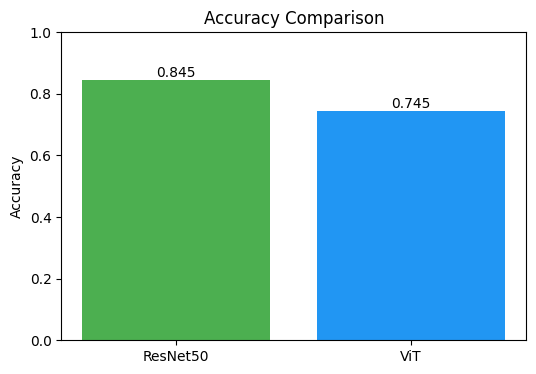

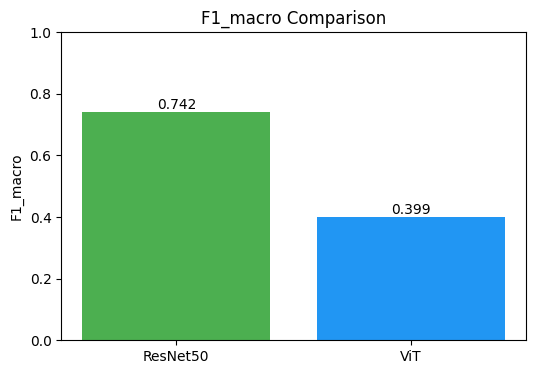

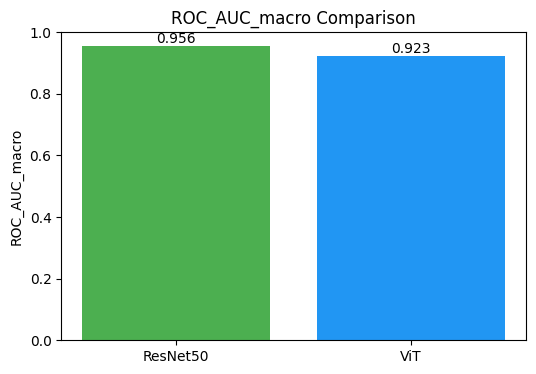

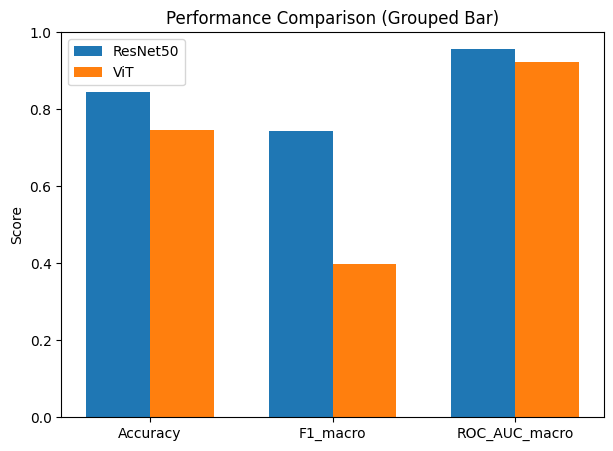

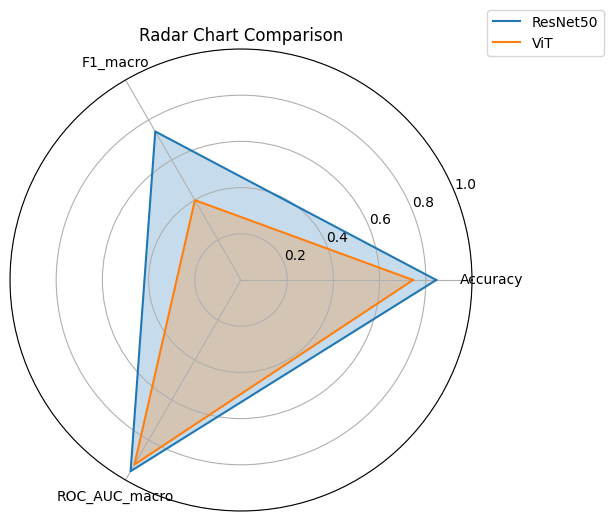

In [29]:
# -------- Imports --------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------- Load results --------
try:
    resnet_df = pd.read_csv('/content/drive/MyDrive/resnet50_baseline_results.csv')
    vit_df = pd.read_csv('/content/drive/MyDrive/vit_results.csv')
except FileNotFoundError as e:
    print("⚠️ File not found:", e)
    raise

resnet_df['Model'] = 'ResNet50'
vit_df['Model'] = 'ViT'

# Combine
results_df = pd.concat([resnet_df, vit_df], ignore_index=True)
print("📊 Summary Table:")
display(results_df)

# -------- Plot 1: Simple Bar Charts (per metric) --------
metrics = ["Accuracy", "F1_macro", "ROC_AUC_macro"]

for metric in metrics:
    plt.figure(figsize=(6,4))
    plt.bar(results_df['Model'], results_df[metric], color=['#4caf50','#2196f3'])
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.ylim(0,1)
    for i, v in enumerate(results_df[metric]):
        plt.text(i, v+0.01, f"{v:.3f}", ha='center', fontsize=10)
    plt.show()

# -------- Plot 2: Grouped Bar Chart --------
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(7,5))
plt.bar(x - width/2, resnet_df[metrics].iloc[0], width, label="ResNet50")
plt.bar(x + width/2, vit_df[metrics].iloc[0], width, label="ViT")

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Performance Comparison (Grouped Bar)")
plt.ylim(0,1)
plt.legend()
plt.show()

# -------- Plot 3: Radar Chart --------
def radar_chart(models, metrics):
    N = len(metrics)
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    for model, vals in models.items():
        vals = np.concatenate((vals,[vals[0]]))
        ax.plot(angles, vals, label=model)
        ax.fill(angles, vals, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    ax.set_ylim(0,1)
    ax.legend(loc="upper right", bbox_to_anchor=(1.3,1.1))
    plt.title("Radar Chart Comparison")
    plt.show()

models = {
    "ResNet50": resnet_df[metrics].iloc[0].values,
    "ViT": vit_df[metrics].iloc[0].values
}

radar_chart(models, metrics)


# Visualizing and comparing final performance metrics of ResNet50 and ViT models.
# Loads evaluation results and presents them using:
# - Bar chart for grouped metric comparison
# - Heatmap for intuitive metric overview
# - Line plot to show metric trends across models


📊 Summary Table:


,Accuracy,F1_macro,ROC_AUC_macro,Model
0,0.845232,0.742436,0.956146,ResNet50
1,0.744883,0.399118,0.922753,ViT


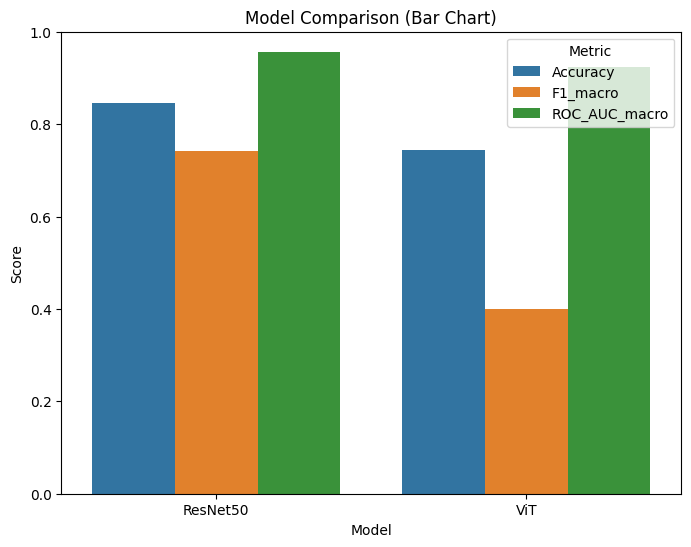

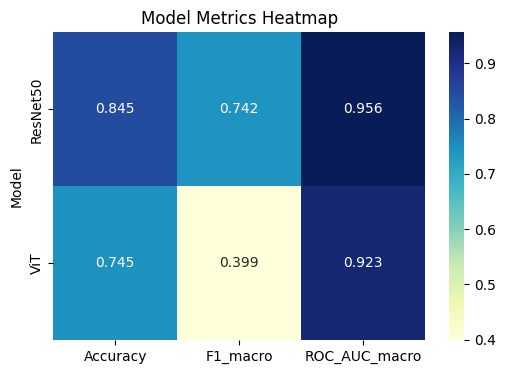

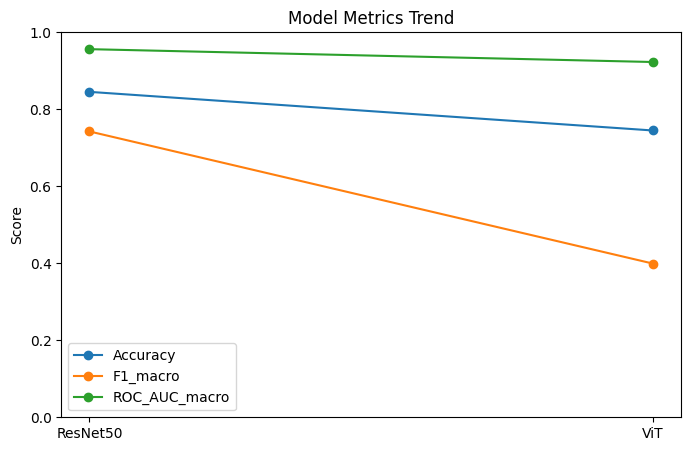

In [30]:
# -------- Imports --------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------- Load Results --------
resnet_results = pd.read_csv('/content/drive/MyDrive/resnet50_baseline_results.csv')
vit_results = pd.read_csv('/content/drive/MyDrive/vit_results.csv')

# اضافه کردن ستون مدل برای هر نتیجه
resnet_results["Model"] = "ResNet50"
vit_results["Model"] = "ViT"

# تجمیع در یک جدول
all_results = pd.concat([resnet_results, vit_results], ignore_index=True)
print("📊 Summary Table:")
display(all_results)

# -------- Plot 1: Bar Chart --------
plt.figure(figsize=(8,6))
all_results_melted = all_results.melt(id_vars="Model", value_vars=["Accuracy","F1_macro","ROC_AUC_macro"])
sns.barplot(x="Model", y="value", hue="variable", data=all_results_melted)
plt.title("Model Comparison (Bar Chart)")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(title="Metric")
plt.show()

# -------- Plot 2: Heatmap --------
plt.figure(figsize=(6,4))
heatmap_data = all_results.set_index("Model")[["Accuracy","F1_macro","ROC_AUC_macro"]]
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Model Metrics Heatmap")
plt.show()

# -------- Plot 3: Line Plot --------
plt.figure(figsize=(8,5))
for metric in ["Accuracy","F1_macro","ROC_AUC_macro"]:
    plt.plot(all_results["Model"], all_results[metric], marker="o", label=metric)
plt.title("Model Metrics Trend")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend()
plt.show()


# Performing lightweight saliency analysis using Captum's Saliency method.
# Loads the trained model (ViT or ResNet), preprocesses sample skin lesion images,
# and generates saliency maps to highlight regions most influential in the model's predictions.
# This helps interpret model behavior and validate its decision-making process.



🔹 Image 1: /content/dataset/ham10000_images/ISIC_0031301.jpg
Predicted class: bkl


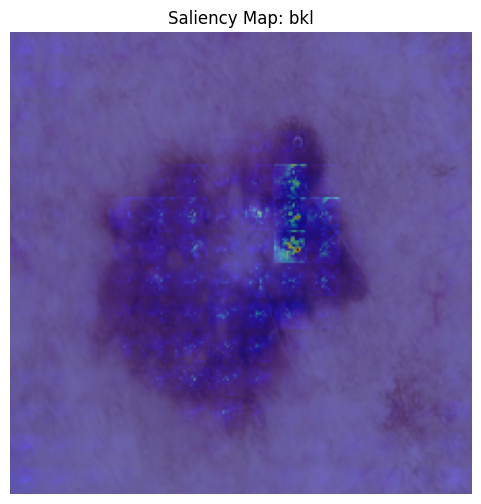


🔹 Image 2: /content/dataset/ham10000_images/ISIC_0031302.jpg
Predicted class: nv


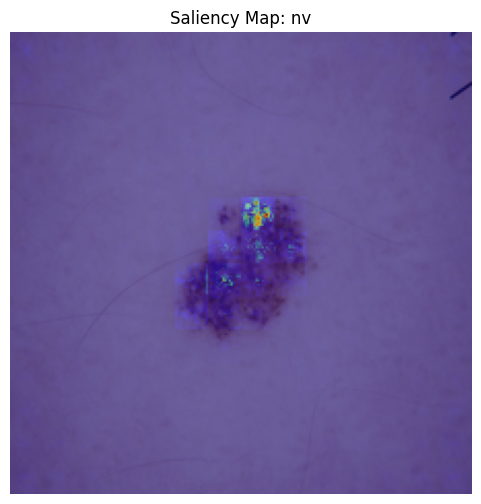


🔹 Image 3: /content/dataset/ham10000_images/ISIC_0031303.jpg
Predicted class: bkl


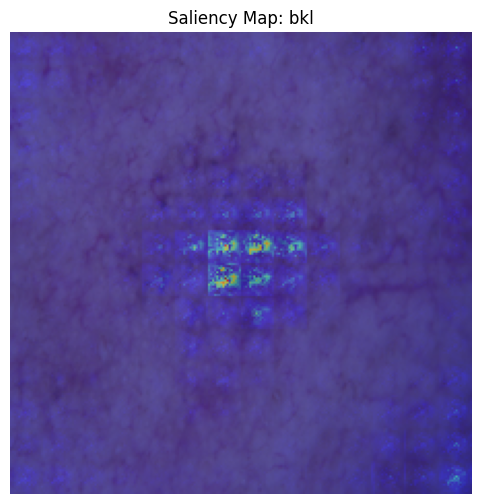

In [35]:
# -------- XAI Analysis (Lightweight Saliency) --------
import torch
from fastai.vision.all import *
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from captum.attr import Saliency

# -------- Load Model --------
model_path = '/content/drive/MyDrive/vit_export.pkl'  # مسیر مدل ViT یا ResNet
learn = load_learner(model_path)
model = learn.model
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# -------- Sample Images --------
sample_paths = [
    '/content/dataset/ham10000_images/ISIC_0031301.jpg',
    '/content/dataset/ham10000_images/ISIC_0031302.jpg',
    '/content/dataset/ham10000_images/ISIC_0031303.jpg'
]
vocab = learn.dls.vocab

# -------- Preprocess Function --------
def preprocess_image(path):
    img = Image.open(path).convert('RGB').resize((224,224))
    xb = torch.tensor(np.array(img)/255., dtype=torch.float).permute(2,0,1).unsqueeze(0)
    return xb.to(device)

# -------- Saliency (Grad-CAM سبک) --------
saliency = Saliency(model)

for i, path in enumerate(sample_paths):
    xb = preprocess_image(path)
    xb.requires_grad_()

    # Prediction
    out = model(xb)
    pred_class = out.argmax(dim=1).item()
    print(f"\n🔹 Image {i+1}: {path}")
    print("Predicted class:", vocab[pred_class])

    # Saliency map
    attr = saliency.attribute(xb, target=pred_class)
    attr = attr.squeeze().cpu().detach().numpy()

    # Normalize for visualization
    attr = np.maximum(attr, 0)
    attr = attr / (attr.max() + 1e-8)
    attr = np.transpose(attr, (1,2,0))

    # Overlay on original image
    img = np.array(Image.open(path).convert('RGB').resize((224,224)))/255.
    heatmap = np.mean(attr, axis=2)  # Combine channels
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.imshow(heatmap, cmap='jet', alpha=0.5)
    plt.title(f"Saliency Map: {vocab[pred_class]}")
    plt.axis('off')
    plt.show()


# Generating a lightweight XAI gallery for ResNet50 and ViT models using gradient-based saliency.
# For each model, visualizes attention overlays on sample skin lesion images from different classes.
# Helps compare how each model interprets and focuses on different regions during prediction.



=== Model: ResNet50 ===


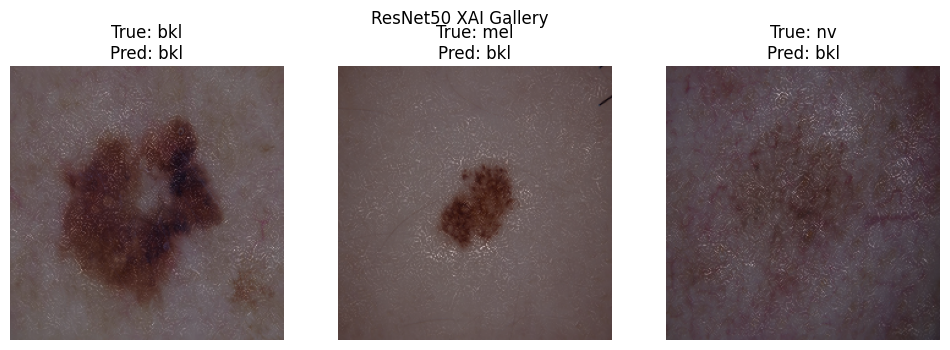


=== Model: ViT ===


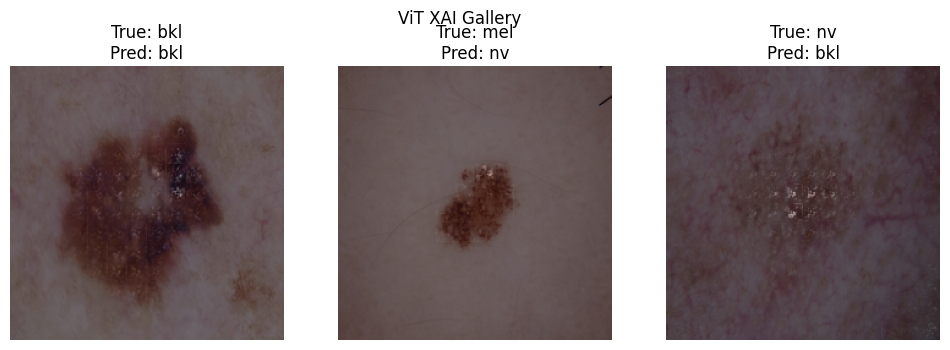

In [36]:
# -------- Lightweight XAI Gallery for ResNet50 & ViT --------
import torch
from fastai.vision.all import *
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# -------- Models & Paths --------
models_info = {
    "ResNet50": "/content/drive/MyDrive/resnet50_baseline_export.pkl",
    "ViT": "/content/drive/MyDrive/vit_export.pkl"
}

# -------- Sample images per class --------
sample_paths_per_class = {
    "bkl": "/content/dataset/ham10000_images/ISIC_0031301.jpg",
    "mel": "/content/dataset/ham10000_images/ISIC_0031302.jpg",
    "nv":  "/content/dataset/ham10000_images/ISIC_0031303.jpg"
    # می‌توانید کلاس‌های دیگر را اضافه کنید
}

# -------- Preprocess Function --------
def preprocess_image(path):
    img = Image.open(path).convert('RGB').resize((224,224))
    xb = torch.tensor(np.array(img)/255., dtype=torch.float).permute(2,0,1).unsqueeze(0)
    return xb, np.array(img)/255.

# -------- Lightweight Grad-CAM for ViT/ResNet --------
def compute_gradcam(model, xb):
    model.eval()
    xb = xb.requires_grad_(True)
    out = model(xb)
    pred_class = out.argmax(dim=1).item()

    # ساده‌ترین نسخه: Gradient * Input
    out[0, pred_class].backward(retain_graph=True)
    gradients = xb.grad.data
    cam = torch.mean(gradients, dim=1).squeeze().detach().numpy()
    cam = np.maximum(cam, 0)
    cam = cam - cam.min()
    cam = cam / (cam.max() + 1e-6)
    cam = np.stack([cam]*3, axis=-1)  # shape: (H,W,3)
    return pred_class, cam

# -------- Plotting Gallery --------
for model_name, model_path in models_info.items():
    print(f"\n=== Model: {model_name} ===")
    learn = load_learner(model_path)
    model = learn.model
    vocab = learn.dls.vocab

    plt.figure(figsize=(12,4))
    for i, (cls, path) in enumerate(sample_paths_per_class.items()):
        xb, img_np = preprocess_image(path)
        pred_class, cam = compute_gradcam(model, xb)

        overlay = 0.5*img_np + 0.5*cam
        overlay = np.clip(overlay, 0, 1)

        plt.subplot(1, len(sample_paths_per_class), i+1)
        plt.imshow(overlay)
        plt.title(f"True: {cls}\nPred: {vocab[pred_class]}")
        plt.axis('off')
    plt.suptitle(f"{model_name} XAI Gallery")
    plt.show()


# Exporting a summary report comparing ResNet50 and ViT model performance.
# Combines evaluation metrics into a single CSV file and visualizes them using:
# - Bar chart for grouped metric comparison
# - Heatmap for intuitive overview of model scores


fairness


✅ All model results exported!


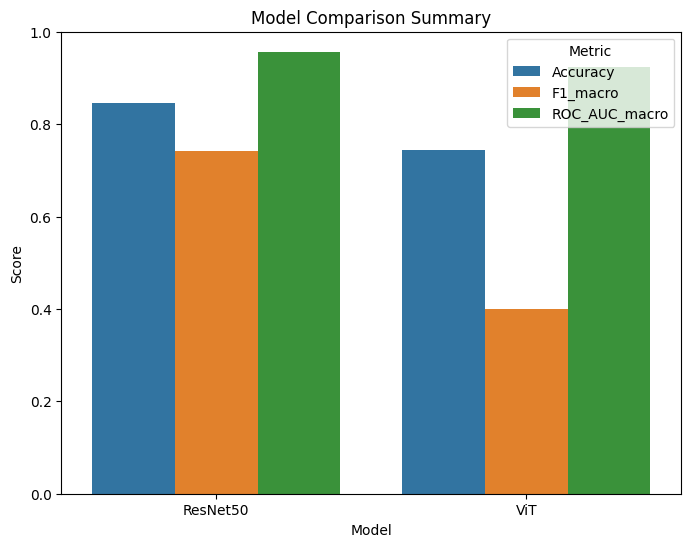

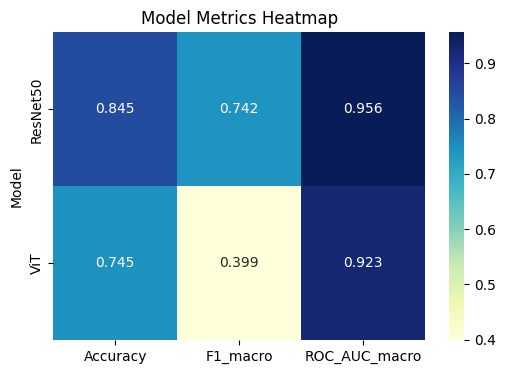

In [44]:
# -------- Export Summary Report --------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------- Load previous results --------
resnet_results = pd.read_csv('/content/drive/MyDrive/resnet50_baseline_results.csv')
vit_results = pd.read_csv('/content/drive/MyDrive/vit_results.csv')

# اضافه کردن ستون مدل
resnet_results["Model"] = "ResNet50"
vit_results["Model"] = "ViT"

# ادغام در یک جدول
all_results = pd.concat([resnet_results, vit_results], ignore_index=True)
all_results.to_csv('/content/drive/MyDrive/all_model_results.csv', index=False)
print("✅ All model results exported!")

# -------- Summary Bar Chart --------
plt.figure(figsize=(8,6))
all_results_melted = all_results.melt(id_vars="Model", value_vars=["Accuracy","F1_macro","ROC_AUC_macro"])
sns.barplot(x="Model", y="value", hue="variable", data=all_results_melted)
plt.title("Model Comparison Summary")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(title="Metric")
plt.show()

# -------- Summary Heatmap --------
plt.figure(figsize=(6,4))
heatmap_data = all_results.set_index("Model")[["Accuracy","F1_macro","ROC_AUC_macro"]]
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Model Metrics Heatmap")
plt.show()


# Exporting a full HTML report summarizing AI model performance and interpretability.
# Includes:
# - A results table comparing ResNet50 and ViT
# - Bar chart and heatmap visualizations
# - Embedded XAI images for visual explanation
# The report is saved to Google Drive for sharing or documentation.


In [45]:
# -------- Full Report Export (HTML) --------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import base64
from io import BytesIO

# مسیر ذخیره گزارش
report_path = Path("/content/drive/MyDrive/model_report.html")

# -------- Load results --------
resnet_results = pd.read_csv('/content/drive/MyDrive/resnet50_baseline_results.csv')
vit_results    = pd.read_csv('/content/drive/MyDrive/vit_results.csv')

resnet_results["Model"] = "ResNet50"
vit_results["Model"]    = "ViT"
all_results = pd.concat([resnet_results, vit_results], ignore_index=True)

# -------- Helper function: convert plot to base64 image --------
def plot_to_base64(fig):
    buf = BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight')
    plt.close(fig)
    buf.seek(0)
    img_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return img_base64

# -------- Create plots and convert to images --------
# Bar chart
fig1 = plt.figure(figsize=(8,6))
melted = all_results.melt(id_vars="Model", value_vars=["Accuracy","F1_macro","ROC_AUC_macro"])
sns.barplot(x="Model", y="value", hue="variable", data=melted)
plt.title("Model Comparison Summary")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(title="Metric")
bar_chart_img = plot_to_base64(fig1)

# Heatmap
fig2 = plt.figure(figsize=(6,4))
heatmap_data = all_results.set_index("Model")[["Accuracy","F1_macro","ROC_AUC_macro"]]
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Model Metrics Heatmap")
heatmap_img = plot_to_base64(fig2)

# -------- XAI images --------
xai_images_paths = [
    "/content/drive/MyDrive/xai_image1.png",
    "/content/drive/MyDrive/xai_image2.png",
    "/content/drive/MyDrive/xai_image3.png"
]

xai_imgs_html = ""
for path in xai_images_paths:
    if Path(path).exists():
        with open(path, "rb") as f:
            img_base64 = base64.b64encode(f.read()).decode('utf-8')
            xai_imgs_html += f'<h4>{Path(path).name}</h4><img src="data:image/png;base64,{img_base64}" width="400"><br>'

# -------- Build HTML --------
html_content = f"""
<html>
<head><title>Model Report</title></head>
<body>
<h1>📊 AI Model Report</h1>

<h2>Summary Table</h2>
{all_results.to_html(index=False)}

<h2>Bar Chart Comparison</h2>
<img src="data:image/png;base64,{bar_chart_img}">

<h2>Metrics Heatmap</h2>
<img src="data:image/png;base64,{heatmap_img}">

<h2>XAI Images</h2>
{xai_imgs_html}

</body>
</html>
"""

# -------- Save report --------
with open(report_path, "w") as f:
    f.write(html_content)

print(f"✅ Report saved at: {report_path}")


✅ Report saved at: /content/drive/MyDrive/model_report.html


# Generating a complete HTML report summarizing AI model performance and interpretability.
# Includes:
# - Combined results table for ResNet50 and ViT
# - Bar chart, heatmap, and line plot visualizations
# - Embedded XAI images (Grad-CAM / SHAP) from local folder
# The report is saved to Google Drive for documentation and sharing.


In [46]:
# -------- Complete Report Generation --------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import base64
from io import BytesIO
import torch
from fastai.vision.all import *
import numpy as np

# -------- Paths --------
report_path = Path("/content/drive/MyDrive/full_model_report.html")
resnet_csv = Path("/content/drive/MyDrive/resnet50_baseline_results.csv")
vit_csv    = Path("/content/drive/MyDrive/vit_results.csv")
xai_folder = Path("/content/drive/MyDrive/xai_images/")  # پوشه تصاویر Grad-CAM/SHAP

# -------- Load Results --------
resnet_results = pd.read_csv(resnet_csv)
vit_results    = pd.read_csv(vit_csv)
resnet_results["Model"] = "ResNet50"
vit_results["Model"]    = "ViT"
all_results = pd.concat([resnet_results, vit_results], ignore_index=True)

# -------- Helper: plot to base64 --------
def plot_to_base64(fig):
    buf = BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight')
    plt.close(fig)
    buf.seek(0)
    img_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return img_base64

# -------- Create Plots --------
# Bar Chart
fig1 = plt.figure(figsize=(8,6))
melted = all_results.melt(id_vars="Model", value_vars=["Accuracy","F1_macro","ROC_AUC_macro"])
sns.barplot(x="Model", y="value", hue="variable", data=melted)
plt.title("Model Comparison Summary")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(title="Metric")
bar_chart_img = plot_to_base64(fig1)

# Heatmap
fig2 = plt.figure(figsize=(6,4))
heatmap_data = all_results.set_index("Model")[["Accuracy","F1_macro","ROC_AUC_macro"]]
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Model Metrics Heatmap")
heatmap_img = plot_to_base64(fig2)

# Line Plot
fig3 = plt.figure(figsize=(8,5))
for metric in ["Accuracy","F1_macro","ROC_AUC_macro"]:
    plt.plot(all_results["Model"], all_results[metric], marker="o", label=metric)
plt.title("Model Metrics Trend")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend()
line_plot_img = plot_to_base64(fig3)

# -------- Add XAI images (Grad-CAM / SHAP) --------
xai_imgs_html = ""
if xai_folder.exists():
    for img_path in xai_folder.glob("*.png"):
        with open(img_path, "rb") as f:
            img_base64 = base64.b64encode(f.read()).decode('utf-8')
            xai_imgs_html += f'<h4>{img_path.name}</h4><img src="data:image/png;base64,{img_base64}" width="400"><br>'

# -------- Build HTML --------
html_content = f"""
<html>
<head><title>Full AI Model Report</title></head>
<body>
<h1>📊 Full AI Model Report</h1>

<h2>Summary Table</h2>
{all_results.to_html(index=False)}

<h2>Bar Chart Comparison</h2>
<img src="data:image/png;base64,{bar_chart_img}">

<h2>Metrics Heatmap</h2>
<img src="data:image/png;base64,{heatmap_img}">

<h2>Line Plot Trend</h2>
<img src="data:image/png;base64,{line_plot_img}">

<h2>XAI Images (Grad-CAM / SHAP)</h2>
{xai_imgs_html}

</body>
</html>
"""

# -------- Save HTML Report --------
with open(report_path, "w") as f:
    f.write(html_content)

print(f"✅ Full report saved at: {report_path}")


✅ Full report saved at: /content/drive/MyDrive/full_model_report.html
